# Final Project
## OMIS 115
## June 5, 2020
## Cathy Liu and Kyle Schryver

### Dataset: http://archive.ics.uci.edu/ml/datasets/Bank+Marketing
###### [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

#### The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.
#### 41188 instances, 20 inputs, 1 output, 2008-2010

### The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

## Data Preparation and Cleaning

In [1]:
from pandas import *
df = read_csv("bank-additional-full.csv", sep=';') # csv needs to be in current directory

In [2]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Not much needs to be done to clean the data. There are no NA values, and most columns do not have outliers or problematic values. pdays = 999 means they were not previously contacted.

In [4]:
df.drop(columns='emp.var.rate',inplace=True) # this attribute is not necessary and may cause noise
# it attemps to capture variation in employment rates during a time period but is not necessary in our model
# all the of the data in our model is from 2008-2010, right after the 2008 financial crisus and thus will naturally have variability that cannot be captured in the employee variation rate.

In [5]:
df.drop(columns='duration', inplace=True) # this attribute highly affects the output target (e.g., if duration=0 then y='no'). 
# Yet, the duration is not known before a call is performed. 
# Also, after the end of the call y is obviously known. 
# Thus, this input is removed to make a more accurate model.

In [6]:
df.drop(columns='nr.employed',inplace = True) # macroeconomic feature, had too much influence 
# so it was dropped in order to better examine individual instances

In [7]:
# Turn y into binary (1,0) instead of yes,no
df['y2'] = df.y.apply(lambda x: 0 if x.startswith('no') else 1)
df.drop(columns='y', inplace=True)
df.rename(columns={'y2':'y'},inplace=True)

In [8]:
len(df)

41188

In [9]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'y'],
      dtype='object')

In [10]:
df.shape

(41188, 18)

In [11]:
df.isna().any().any()

False

In [12]:
len(df[df.y == 1]) # CLT verified since n = 41188 which is > 30. True occurence ~= 11%

4640

## Descriptive Statistics

In [13]:
df.describe()

,age,campaign,pdays,previous,cons.price.idx,cons.conf.idx,euribor3m,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,962.475454,0.172963,93.575664,-40.502600,3.621291,0.112654
std,10.42125,2.770014,186.910907,0.494901,0.578840,4.628198,1.734447,0.316173
min,17.00000,1.000000,0.000000,0.000000,92.201000,-50.800000,0.634000,0.000000
25%,32.00000,1.000000,999.000000,0.000000,93.075000,-42.700000,1.344000,0.000000
50%,38.00000,2.000000,999.000000,0.000000,93.749000,-41.800000,4.857000,0.000000
75%,47.00000,3.000000,999.000000,0.000000,93.994000,-36.400000,4.961000,0.000000
max,98.00000,56.000000,999.000000,7.000000,94.767000,-26.900000,5.045000,1.000000


No missing values or NaN. Most attributes have relatively low standard deviations. One that don't are campaign and previous (number of contacts performed before this campaign and for this client). All four indexes at the end of the df are used to capture macroeconomic variables that might have an impact on the target variable. They all have low standard deviation as expected since the data was all taken within 2 years, during which there was a recession.

In [14]:
df.age.describe()

count    41188.00000
mean        40.02406
std         10.42125
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64

Age is an interesting attribute to examine in this project. 75% of the data can be captured within the age range of 32-47, signaling that people targeted were generally young or middle aged adults.

In [15]:
df.previous.describe()

count    41188.000000
mean         0.172963
std          0.494901
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          7.000000
Name: previous, dtype: float64

Looking at previous tells us that >75% of clients had not been previously contacted in terms of the current instance. One client was contacted 7 times, which is interesting and we can look into that below. 

In [16]:
df[df.previous == 7]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,euribor3m,y
41081,51,admin.,divorced,high.school,no,yes,no,cellular,nov,tue,1,3,7,success,94.767,-50.8,1.049,0


The client contacted 7 times did not end up closing on a term deposit.

In [17]:
df.corr()

,age,campaign,pdays,previous,cons.price.idx,cons.conf.idx,euribor3m,y
age,1.000000,0.004594,-0.034369,0.024365,0.000857,0.129372,0.010767,0.030399
campaign,0.004594,1.000000,0.052584,-0.079141,0.127836,-0.013733,0.135133,-0.066357
pdays,-0.034369,0.052584,1.000000,-0.587514,0.078889,-0.091342,0.296899,-0.324914
previous,0.024365,-0.079141,-0.587514,1.000000,-0.203130,-0.050936,-0.454494,0.230181
cons.price.idx,0.000857,0.127836,0.078889,-0.203130,1.000000,0.058986,0.688230,-0.136211
cons.conf.idx,0.129372,-0.013733,-0.091342,-0.050936,0.058986,1.000000,0.277686,0.054878
euribor3m,0.010767,0.135133,0.296899,-0.454494,0.688230,0.277686,1.000000,-0.307771
y,0.030399,-0.066357,-0.324914,0.230181,-0.136211,0.054878,-0.307771,1.000000


In [18]:
cor = df.drop(columns = ['cons.price.idx','cons.conf.idx','euribor3m','y']).corr() 
# removed overall indexes not unique to individuals

In [19]:
cor = cor[cor < 1]

In [20]:
cor.stack().nlargest(10)

campaign  pdays       0.052584
pdays     campaign    0.052584
age       previous    0.024365
previous  age         0.024365
age       campaign    0.004594
campaign  age         0.004594
age       pdays      -0.034369
pdays     age        -0.034369
campaign  previous   -0.079141
previous  campaign   -0.079141
dtype: float64

Campaign and pdays are correlated since those who have been contacted before will have a reasonable value for pdays while those that weren't will have 999 in pdays. Most of the other correlations are relatively low and don't have a strong explanation. Previous and age might be correlated because older people are more likely to be contacted more often as the caller might expect that older people are more interested in putting money in the bank. Overall all these correlations are very low.

## Initial Visualization

In [21]:
import seaborn as sns
import numpy as np
import pandas as pd

In [22]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'y'],
      dtype='object')

### Age

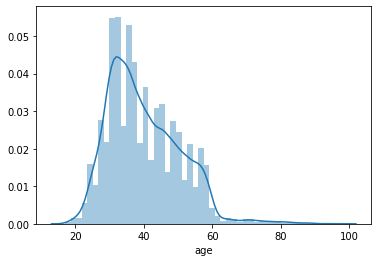

In [23]:
sns.distplot(df.age)

### Job

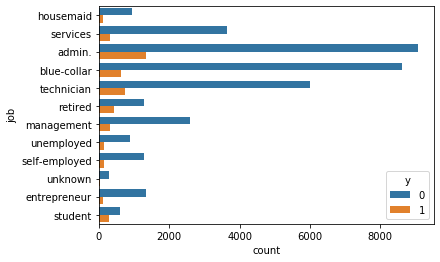

In [24]:
sns.countplot(y='job',hue='y',data=df)

### Education

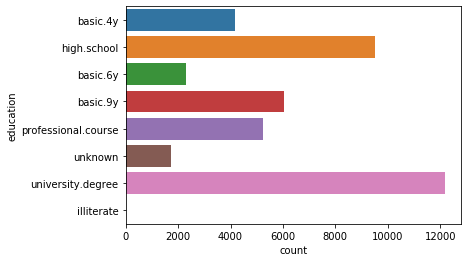

In [25]:
sns.countplot(y='education', data = df)

### Age and Marital

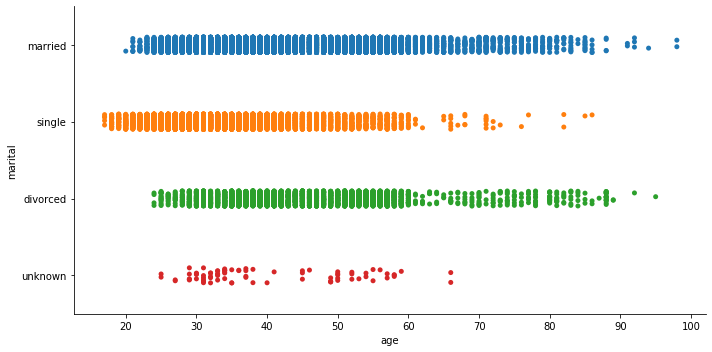

In [26]:
sns.catplot(x='age', y='marital', data = df, aspect = 2)

In [27]:
# Before we applying ML models, we need to convert the categorical features to numeric value
df1 = pd.get_dummies(df)

In [28]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 61 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   campaign                       41188 non-null  int64  
 2   pdays                          41188 non-null  int64  
 3   previous                       41188 non-null  int64  
 4   cons.price.idx                 41188 non-null  float64
 5   cons.conf.idx                  41188 non-null  float64
 6   euribor3m                      41188 non-null  float64
 7   y                              41188 non-null  int64  
 8   job_admin.                     41188 non-null  uint8  
 9   job_blue-collar                41188 non-null  uint8  
 10  job_entrepreneur               41188 non-null  uint8  
 11  job_housemaid                  41188 non-null  uint8  
 12  job_management                 41188 non-null 

## ML Model Selection

In [29]:
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split as SPLIT
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

### Train Test Split

In [30]:
X = df1.drop(columns = 'y') # All columns except for 'y'
y = df1['y']

X_train, X_test, y_train, y_test = SPLIT(X, y, random_state = 0)

In [31]:
Scaled = StandardScaler()
X_train = Scaled.fit_transform(X_train)
X_test = Scaled.transform(X_test)

### Applying KNN Algorithm

In [32]:
from sklearn.neighbors import KNeighborsClassifier as KNN
my_knn = KNN(n_neighbors = 40).fit(X_train,y_train)
# Aftering tring some Ks within 1 to (√41188 / 2)=101, K = 40 seems to work the best

In [33]:
cv_score = cross_val_score(my_knn, X, y, cv=10, scoring='accuracy')
print ('Average cross-validation score is', np.mean(cv_score))

Average cross-validation score is 0.8322473850730944


In [34]:
y_predict = my_knn.predict(X_test)
print('Accuracy on test data is', accuracy_score(y_test,y_predict))

Accuracy on test data is 0.8979314363406817


In [35]:
y_predict_train = my_knn.predict(X_train)
print('Accuracy on train data is', accuracy_score(y_train,y_predict_train))

Accuracy on train data is 0.8997442620828073


In [36]:
# Create an Evaluation Table
Evaluation_Table = pd.DataFrame()
Evaluation_Table['KNN'] = [np.mean(cv_score), accuracy_score(y_test,y_predict), accuracy_score(y_train,y_predict_train)]
Evaluation_Table.rename(index = {0:'cv_score', 1:'Test Accuracy', 2:'Train Accuracy'},inplace = True)
Evaluation_Table

,KNN
cv_score,0.832247
Test Accuracy,0.897931
Train Accuracy,0.899744


### Applying Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression
my_LogR = LogisticRegression().fit(X_train,y_train)

In [38]:
cv_score = cross_val_score(my_LogR, X, y, cv=10, scoring='accuracy')
print ('Average cross-validation score is', np.mean(cv_score))

C:\Users\Kyle\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Kyle\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

Average cross-validation score is 0.8272707201173066


C:\Users\Kyle\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [39]:
y_predict = my_LogR.predict(X_test)
print('Accuracy on test data is', accuracy_score(y_test,y_predict))

Accuracy on test data is 0.8976400893464116


In [40]:
y_predict_train = my_LogR.predict(X_train)
print('Accuracy on train data is', accuracy_score(y_train,y_predict_train))

Accuracy on train data is 0.9013304846071671


In [41]:
Evaluation_Table['LogR'] = [np.mean(cv_score), accuracy_score(y_test,y_predict), accuracy_score(y_train,y_predict_train)]
Evaluation_Table

,KNN,LogR
cv_score,0.832247,0.827271
Test Accuracy,0.897931,0.897640
Train Accuracy,0.899744,0.901330


### Applying SVC

In [42]:
#from sklearn.svm import SVC
#my_SVC = SVC(kernel = 'linear').fit(X_train,y_train)

In [43]:
#cv_score = cross_val_score(my_SVC, X, y, cv=10, scoring='accuracy')
#print ('Average cross-validation score is', np.mean(cv_score))

In [44]:
#y_predict = my_SVC.predict(X_test_scaled)
#print('Accuracy on test data is', accuracy_score(y_test,y_predict))

In [45]:
#Evaluation_Table['SVC'] = [np.mean(cv_score), accuracy_score(y_test,y_predict)]
#Evaluation_Table

The SVC model runs very slow on this dataset. It was left commented out to optimize for speed as it was not in the top 3 most accurate models.

According to a post on stackexhange: 
" The implementation is based on libsvm. The fit time complexity is more than quadratic with the number of samples which makes it hard to scale to dataset with more than a couple of 10000 samples. "

Thus for our data of size 41800, the model takes very long to run.

### Applying GNB

In [46]:
from sklearn.naive_bayes import GaussianNB
my_GNB = GaussianNB().fit(X_train,y_train)

In [47]:
cv_score = cross_val_score(my_GNB, X, y, cv=10, scoring='accuracy')
print ('Average cross-validation score is', np.mean(cv_score))

Average cross-validation score is 0.7493155069419118


In [48]:
y_predict = my_GNB.predict(X_test)
print('Accuracy on test data is', accuracy_score(y_test,y_predict))

Accuracy on test data is 0.6747596387297271


In [49]:
y_predict_train = my_GNB.predict(X_train)
print('Accuracy on train data is', accuracy_score(y_train,y_predict_train))

Accuracy on train data is 0.6711663591337282


In [50]:
Evaluation_Table['GNB'] = [np.mean(cv_score), accuracy_score(y_test,y_predict), accuracy_score(y_train,y_predict_train)]
Evaluation_Table

,KNN,LogR,GNB
cv_score,0.832247,0.827271,0.749316
Test Accuracy,0.897931,0.897640,0.674760
Train Accuracy,0.899744,0.901330,0.671166


### Applying Decision Tree

In [51]:
from sklearn.tree import DecisionTreeClassifier
my_Tree = DecisionTreeClassifier(max_depth = 5).fit(X_train,y_train)

In [52]:
cv_score = cross_val_score(my_Tree, X, y, cv=10, scoring='accuracy')
print ('Average cross-validation score is', np.mean(cv_score))

Average cross-validation score is 0.5954322244927821


In [53]:
y_predict = my_Tree.predict(X_test)
print('Accuracy on test data is', accuracy_score(y_test,y_predict))

Accuracy on test data is 0.9000679809653297


In [54]:
y_predict_train = my_Tree.predict(X_train)
print('Accuracy on train data is', accuracy_score(y_train,y_predict_train))

Accuracy on train data is 0.9039849794438509


In [55]:
Evaluation_Table['Decision Tree'] = [np.mean(cv_score), accuracy_score(y_test,y_predict), accuracy_score(y_train,y_predict_train)]
Evaluation_Table

,KNN,LogR,GNB,Decision Tree
cv_score,0.832247,0.827271,0.749316,0.595432
Test Accuracy,0.897931,0.897640,0.674760,0.900068
Train Accuracy,0.899744,0.901330,0.671166,0.903985


In [56]:
importances = my_Tree.feature_importances_

In [57]:
importances[importances != 0] # excluse values of 0

array([5.09330490e-03, 5.73456559e-03, 1.37474803e-01, 1.36217640e-02,
       7.14748316e-01, 8.59190800e-04, 2.26280403e-03, 5.45483055e-04,
       1.47674223e-03, 2.51841804e-03, 2.49253847e-03, 1.19047268e-02,
       8.80085697e-03, 4.83744346e-02, 2.49928963e-02, 4.46218870e-03,
       1.46369667e-02])

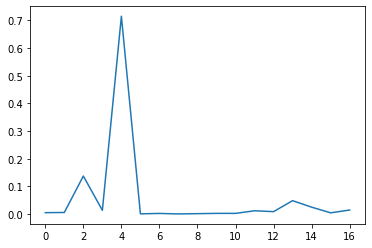

In [58]:
plt.plot(importances[importances != 0])

In [59]:
tree_dict = dict(zip(df1.columns, my_Tree.feature_importances_))

In [60]:
tree_dict = {x:y for x,y in tree_dict.items() if y!=0}

In [61]:
#print feature importance
i = 1
for w in sorted(tree_dict, key=tree_dict.get, reverse=True):
    print("%d. %s: %f " % (i, w, tree_dict[w]))
    i = i + 1

1. euribor3m: 0.714748 
2. pdays: 0.137475 
3. month_mar: 0.048374 
4. month_nov: 0.024993 
5. poutcome_failure: 0.014637 
6. cons.price.idx: 0.013622 
7. contact_cellular: 0.011905 
8. contact_telephone: 0.008801 
9. campaign: 0.005735 
10. age: 0.005093 
11. day_of_week_fri: 0.004462 
12. housing_yes: 0.002518 
13. loan_yes: 0.002493 
14. job_student: 0.002263 
15. education_illiterate: 0.001477 
16. job_housemaid: 0.000859 
17. marital_unknown: 0.000545 


In [62]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95      9139
           1       0.64      0.26      0.37      1158

    accuracy                           0.90     10297
   macro avg       0.77      0.62      0.66     10297
weighted avg       0.88      0.90      0.88     10297



Precision of 0 (the client said no) represents that for all instances predicted as no subscription, the percentage of clients that actually said no is 91%.

Recall is the ability of a classifier to find all positive instances. Recall of 0 indicates that for all clients that actually said no, the model predicts 98% correctly that they would decline the offer.

The report shows that the <b>Deciosn Tree</b> model has great predictive power to identify the customers <b>who would not subscribe </b>to the term deposit. However, because of the limited number of clients accepting the term deposit, there is a need for stratified sampling or rebalancing to deal with this structural weakness.

### Applying Random Forest

In [63]:
from sklearn.ensemble import RandomForestClassifier as FOREST
my_Forest = FOREST(max_features = 8, random_state = 0).fit(X_train, y_train)

In [64]:
cv_score = cross_val_score(my_Forest, X, y, cv=10, scoring='accuracy')
print ('Average cross-validation score is', np.mean(cv_score))

Average cross-validation score is 0.4599282268019381


In [65]:
y_predict = my_Forest.predict(X_test)
print('Accuracy on test data is', accuracy_score(y_test,y_predict))

Accuracy on test data is 0.8938525784208993


In [66]:
y_predict_train = my_Forest.predict(X_train)
print('Accuracy on train data is', accuracy_score(y_train,y_predict_train))

Accuracy on train data is 0.9949499854326503


In [67]:
Evaluation_Table['Random Forest'] = [np.mean(cv_score), accuracy_score(y_test,y_predict), accuracy_score(y_train,y_predict_train)]
Evaluation_Table

,KNN,LogR,GNB,Decision Tree,Random Forest
cv_score,0.832247,0.827271,0.749316,0.595432,0.459928
Test Accuracy,0.897931,0.897640,0.674760,0.900068,0.893853
Train Accuracy,0.899744,0.901330,0.671166,0.903985,0.994950


In [68]:
importances = my_Forest.feature_importances_

In [69]:
forest_dict = dict(zip(df1.columns, my_Forest.feature_importances_))

In [70]:
forest_dict = {x:y for x,y in forest_dict.items() if y!=0}

In [71]:
#print feature importance
i = 1
for w in sorted(forest_dict, key=forest_dict.get, reverse=True):
    print("%d. %s: %f " % (i, w, forest_dict[w]))
    i = i + 1

1. age: 0.158735 
2. euribor3m: 0.136556 
3. campaign: 0.078060 
4. pdays: 0.043733 
5. cons.conf.idx: 0.035686 
6. cons.price.idx: 0.035312 
7. poutcome_nonexistent: 0.031295 
8. housing_unknown: 0.021305 
9. default_yes: 0.020977 
10. y: 0.017512 
11. education_professional.course: 0.016869 
12. marital_divorced: 0.016747 
13. education_basic.9y: 0.016541 
14. previous: 0.015835 
15. day_of_week_mon: 0.015327 
16. marital_married: 0.015293 
17. day_of_week_fri: 0.015208 
18. day_of_week_thu: 0.015034 
19. day_of_week_tue: 0.014977 
20. month_sep: 0.014294 
21. job_student: 0.014209 
22. housing_yes: 0.014065 
23. loan_unknown: 0.013812 
24. job_admin.: 0.012034 
25. education_basic.6y: 0.011692 
26. education_illiterate: 0.011376 
27. job_unknown: 0.010606 
28. day_of_week_wed: 0.010182 
29. job_housemaid: 0.009341 
30. job_self-employed: 0.009241 
31. poutcome_failure: 0.008759 
32. marital_unknown: 0.008584 
33. loan_yes: 0.008358 
34. month_nov: 0.008182 
35. contact_cellular: 0.0

### Applying ANN

In [72]:
from sklearn.neural_network import MLPClassifier
my_ANN = MLPClassifier(activation='tanh', hidden_layer_sizes = [10,10], alpha = 5, random_state = 0, solver = 'lbfgs')
my_ANN.fit(X_train, y_train)

C:\Users\Kyle\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(activation='tanh', alpha=5, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=[10, 10], learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=0, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [73]:
cv_score = cross_val_score(my_ANN, X, y, cv=10, scoring='accuracy')
print ('Average cross-validation score is', np.mean(cv_score))

C:\Users\Kyle\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Kyle\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Kyle\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERAT

Average cross-validation score is 0.8436093248678432


C:\Users\Kyle\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [74]:
y_predict = my_ANN.predict(X_test)
print('Accuracy on test data is', accuracy_score(y_test,y_predict))

Accuracy on test data is 0.8938525784208993


In [75]:
y_predict_train = my_ANN.predict(X_train)
print('Accuracy on train data is', accuracy_score(y_train,y_predict_train))

Accuracy on train data is 0.9105241008708038


In [76]:
Evaluation_Table['ANN'] = [np.mean(cv_score), accuracy_score(y_test,y_predict), accuracy_score(y_train,y_predict_train)]
Evaluation_Table

,KNN,LogR,GNB,Decision Tree,Random Forest,ANN
cv_score,0.832247,0.827271,0.749316,0.595432,0.459928,0.843609
Test Accuracy,0.897931,0.897640,0.674760,0.900068,0.893853,0.893853
Train Accuracy,0.899744,0.901330,0.671166,0.903985,0.994950,0.910524


Our <b>decision tree</b> had the highest accuracy on the test data set, narrowly ahead of Logistic Regression, KNN, ANN, and Random Forest. GNB was the model with the worst performance.

## Evaluation Metrics

### Applying dummy classifier

In [77]:
from sklearn.dummy import DummyClassifier

dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)

y_dummy_predictions = dummy_majority.predict(X_test)

y_dummy_predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [78]:
print ("Accuracy score of Dummy CLassifier = ", accuracy_score(y_test, y_dummy_predictions))

Accuracy score of Dummy CLassifier =  0.8875400602117122


In [79]:
y_dummy_predictions_train = dummy_majority.predict(X_train)

print('Accuracy on train data is ', accuracy_score(y_train,y_dummy_predictions_train))

Accuracy on train data is  0.8872810851056943


In [80]:
cv_score = cross_val_score(dummy_majority, X, y, cv=5)
print ('Average cross-validation score is', np.mean(cv_score))

Average cross-validation score is 0.8873458284837543


The dummy classifier did better than expected on our data set. Evidently even better than the GNB model which is much more complicated. All of our other models however performed better than the dummy classifier. 90% seems to be a soft limit as to how accurate our model can be as the dummy model is near 88.7% while our best model is at 89.99%. 

In [81]:
Evaluation_Table['Dummy'] = [np.mean(cv_score), accuracy_score(y_test,y_dummy_predictions), accuracy_score(y_train,y_dummy_predictions_train)]
Evaluation_Table

,KNN,LogR,GNB,Decision Tree,Random Forest,ANN,Dummy
cv_score,0.832247,0.827271,0.749316,0.595432,0.459928,0.843609,0.887346
Test Accuracy,0.897931,0.897640,0.674760,0.900068,0.893853,0.893853,0.887540
Train Accuracy,0.899744,0.901330,0.671166,0.903985,0.994950,0.910524,0.887281


In [82]:
Etable = Evaluation_Table.cumsum()

<Figure size 432x288 with 0 Axes>

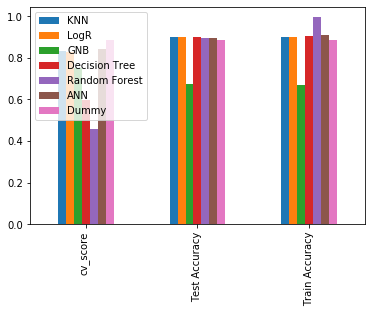

In [83]:
plt.figure()
Evaluation_Table.plot.bar()

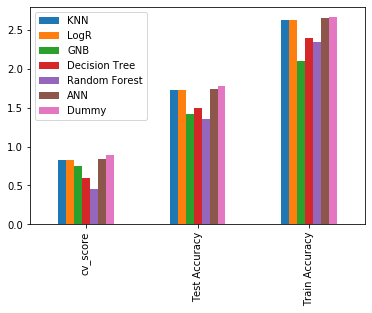

In [84]:
Etable.plot.bar()

## Predictive Errors

In [85]:
# Reapplying KNN algorithm
my_KNN = KNN(n_neighbors = 40).fit(X_train,y_train)
# Aftering tring some Ks within 1 to (√41188 / 2)=101, K = 40 seems to work the best

y_predict = my_KNN.predict(X_test)
print('Accuracy on test data is', accuracy_score(y_test,y_predict))

Accuracy on test data is 0.8979314363406817


In [86]:
CV_scores = cross_val_score(my_KNN, X, y, cv = 10)

In [87]:
print("CV_scores: ", CV_scores)

CV_scores:  [0.8873513  0.8873513  0.88807963 0.88832241 0.88832241 0.90167516
 0.89876184 0.81281865 0.9191355  0.35065566]


In [88]:
print("Average CV_Score: ",np.mean(CV_scores))

Average CV_Score:  0.8322473850730944


In [89]:
from sklearn.model_selection import validation_curve

parameter_ranges = [1, 5, 15]

train_scores, test_scores = validation_curve(my_KNN, X, y, param_name = 'n_neighbors', param_range = parameter_ranges)

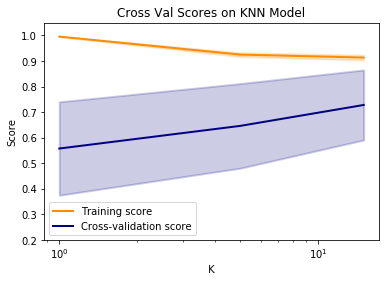

In [90]:
train_scores_mean = np.mean(train_scores, axis=1) # graph code from lecture 7-1
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Cross Val Scores on KNN Model")
plt.xlabel(" K ")
plt.ylabel("Score")
plt.ylim(0.2, 1.05)

lw = 2
plt.semilogx(parameter_ranges, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(parameter_ranges, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha = 0.2,
                 color="darkorange", lw=lw)
plt.semilogx(parameter_ranges, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(parameter_ranges, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

## Overfitting Errors

In [94]:
Evaluation_Table[1:3]

,KNN,LogR,GNB,Decision Tree,Random Forest,ANN,Dummy
Test Accuracy,0.897931,0.89764,0.674760,0.900068,0.893853,0.893853,0.887540
Train Accuracy,0.899744,0.90133,0.671166,0.903985,0.994950,0.910524,0.887281


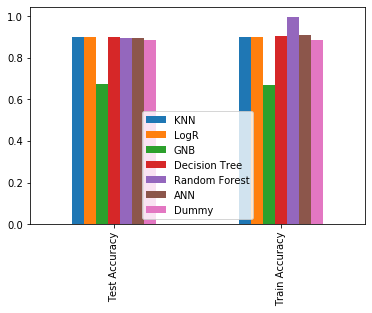

In [104]:
Evaluation_Table[1:3].plot.bar()